<a href="https://colab.research.google.com/github/Sid-Yo/GRIP-The_Sparks_Foundation_DS/blob/master/GRIP_TSF_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2: To Explore Supervised Machine Learning
- In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

#### Importing libraries and data

In [1]:
# Importing all libraries required
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

In [2]:
 # Extracting data from given link
url="http://bit.ly/w-data"
data_s= pd.read_csv(url)
data_s.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data_s.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
#checking for missing values
data_s.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Preparing the Data

In [5]:
data_s=shuffle(data_s,random_state=42)
div=int(data_s.shape[0]/4)
train=data_s.loc[:3*div+1,:]
test=data_s.loc[3*div+1:]
train.shape,test.shape

((24, 2), (2, 2))

In [6]:
train.head()

,Hours,Scores
8,8.3,81
16,2.5,30
0,2.5,21
23,6.9,76
11,5.9,62


In [7]:
test.head()

,Hours,Scores
19,7.4,69
6,9.2,88


In [8]:
test["simple"]=train["Scores"].mode()[0]
test["simple"].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


19    30
6     30
Name: simple, dtype: int64

In [9]:
simple_accuracy=accuracy_score(test["Scores"],test["simple"])
simple_accuracy

0.0

In [10]:
x=data_s.drop(["Scores"],axis=1)
y=data_s["Scores"]
x.shape,y.shape

((25, 1), (25,))

In [11]:
X = data_s['Hours'].values.reshape(-1,1) 
y = data_s['Scores'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#### Training and Predicting

In [13]:
lin_r = LinearRegression()
lin_r.fit(X_train, y_train)
y_pred = lin_r.predict(X_test)
student = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})     # Comparing Actual vs Predicted
student.head()

,Actual,Predicted
0,24,21.189864
1,27,33.812497
2,17,13.422091
3,86,78.477196
4,47,52.260959


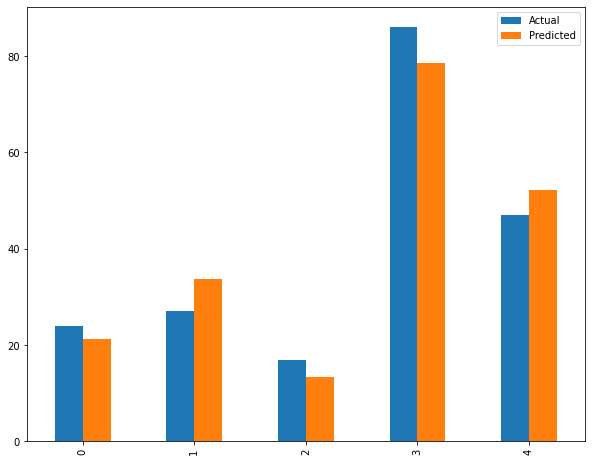

In [14]:
#Visualizing above data for better understanding
student.plot.bar(figsize=(10,8))

- What will be predicted score if a student study for 9.25 hrs in a day?
 
  Let's Check it out

In [15]:
hours = 9.25
pred = lin_r.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 92.5562856994045


In [16]:
# predicting over trains set and calculating error
train_predict=lin_r.predict(X_train)
k=mae(train_predict,y_train)
print("Train Mean Absolute Error",k)

Train Mean Absolute Error 4.904236184655986


In [17]:
# predicting over test set and calculating error
test_predict=lin_r.predict(X_test)
k=mae(test_predict,y_test)
print("Test Mean Absolute Error",k)

Test Mean Absolute Error 5.1968610566155675


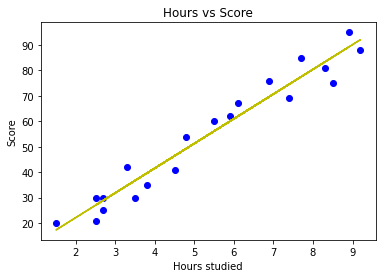

In [18]:
# Visualising Trainig set
plt.scatter(X_train,y_train, color = 'b')
plt.plot(X_train, lin_r.predict(X_train), color = 'y')
plt.title('Hours vs Score')
plt.xlabel('Hours studied')
plt.ylabel('Score')
plt.show()

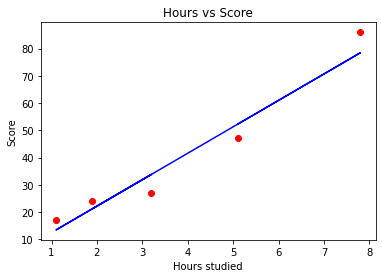

In [19]:
#Visualising Testing set
plt.scatter(X_test,y_test ,color = 'r')
plt.plot(X_test, lin_r.predict(X_test), color = 'b')
plt.title('Hours vs Score')
plt.xlabel('Hours studied')
plt.ylabel('Score')
plt.show()

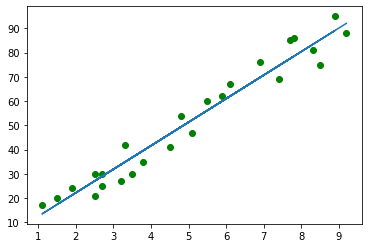

In [20]:
# Plotting the regression line
line = lin_r.coef_*X+lin_r.intercept_
# Plotting for the test data
plt.scatter(X, y,color="green")
plt.plot(X, line);
plt.show()

In [21]:
lin_r.coef_

array([9.70971718])

In [22]:
lin_r.intercept_

2.7414017604472107

In [23]:
lin_r.score(X_test,y_test)

0.9514625220709427

# Result:
### What will be predicted score if a student study for 9.25 hrs in a day?
- If a student study for 9.25 hrs in a day, then his predicted score will be aprox. 92.5562856994045 

 